In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import collections

%matplotlib inline
plt.style.use('ggplot')

In [2]:
students = pd.read_fwf('student.dat')
print(students.info())
print()
students.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 711 entries, 0 to 710
Data columns (total 7 columns):
ID Status     711 non-null int64
Stop          711 non-null object
Start         711 non-null object
Load          711 non-null int64
Arrive Bus    711 non-null object
Route         711 non-null object
Unnamed: 6    711 non-null object
dtypes: int64(2), object(5)
memory usage: 39.0+ KB
None



,ID Status,Stop,Start,Load,Arrive Bus,Route,Unnamed: 6
706,726,UCM,TARG,915,965 989,Bus_3_C,C2
707,728,UCM,TARG,930,965 989,Bus_3_C,C2
708,729,UCM,TARG,945,965 989,Bus_3_C,C2
709,730,UCM,TARG,985,1045 1069,Bus_3_C,C2
710,731,UCM,TARG,1025,1045 1069,Bus_3_C,C2


In [3]:
new = students['Arrive Bus'].str.split(" ", n = 1, expand = True)
students['Bus Arrives'] = new[0]
students['Bus on Campus'] = new[1] 
students.head()

,ID Status,Stop,Start,Load,Arrive Bus,Route,Unnamed: 6,Bus Arrives,Bus on Campus
0,3,UCM,COMP,25,30 69,Bus_3_C,C2,30,69
1,4,UCM,BUEN,25,38 69,Bus_3_C,C2,38,69
2,19,UCM,MVIL,45,47 69,Bus_3_C,C2,47,69
3,5,UCM,TERM,25,51 69,Bus_3_C,C2,51,69
4,11,UCM,TERM,40,51 69,Bus_3_C,C2,51,69


In [4]:
students.drop(columns =["Arrive Bus"], inplace = True)
students.head()

,ID Status,Stop,Start,Load,Route,Unnamed: 6,Bus Arrives,Bus on Campus
0,3,UCM,COMP,25,Bus_3_C,C2,30,69
1,4,UCM,BUEN,25,Bus_3_C,C2,38,69
2,19,UCM,MVIL,45,Bus_3_C,C2,47,69
3,5,UCM,TERM,25,Bus_3_C,C2,51,69
4,11,UCM,TERM,40,Bus_3_C,C2,51,69


In [5]:
students['Bus Arrives'].astype('int')
students['Load'].astype('int')

0        25
1        25
2        45
3        25
4        40
       ... 
706     915
707     930
708     945
709     985
710    1025
Name: Load, Length: 711, dtype: int64

In [6]:
students['Wait Time'] = students['Bus Arrives'].astype('int') - students['Load'].astype('int')
students.head()
# students.columns

,ID Status,Stop,Start,Load,Route,Unnamed: 6,Bus Arrives,Bus on Campus,Wait Time
0,3,UCM,COMP,25,Bus_3_C,C2,30,69,5
1,4,UCM,BUEN,25,Bus_3_C,C2,38,69,13
2,19,UCM,MVIL,45,Bus_3_C,C2,47,69,2
3,5,UCM,TERM,25,Bus_3_C,C2,51,69,26
4,11,UCM,TERM,40,Bus_3_C,C2,51,69,11


In [7]:
box_students = students.drop(columns=['ID Status', 'Stop', 'Load', 'Unnamed: 6', 'Bus Arrives', 'Bus on Campus', 'Route'])

print(box_students['Start'].unique())
box_students.head()

['COMP' 'BUEN' 'MVIL' 'TERM' 'IRON' 'ARRO' 'ALEX' 'RITE' 'PORT' 'GRAN'
 'MAXX' 'RVIL' 'LRED' 'TARG' 'HOSP']


,Start,Wait Time
0,COMP,5
1,BUEN,13
2,MVIL,2
3,TERM,26
4,TERM,11


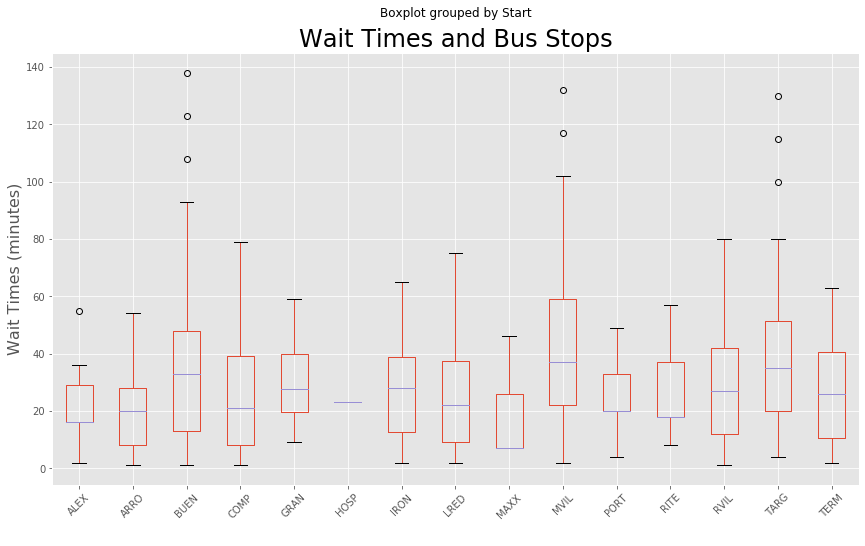

In [25]:
ax = box_students.boxplot(by = 'Start', rot=45, figsize=(14, 8))
ax.set_title('Wait Times and Bus Stops', size=24)
ax.set_ylabel('Wait Times (minutes)', size=16)
ax.set_xlabel(' ', size=16)
fig = ax.get_figure()
# fig.savefig('waittimes.png')

In [26]:
# Data scaled by 2

students = pd.read_fwf('student.dat')
print(students.info())
print()
students.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1423 entries, 0 to 1422
Data columns (total 7 columns):
ID Status     1423 non-null int64
Stop          1423 non-null object
Start         1423 non-null object
Load          1423 non-null int64
Arrive Bus    1423 non-null object
Route         1423 non-null object
Unnamed: 6    1423 non-null object
dtypes: int64(2), object(5)
memory usage: 77.9+ KB
None



,ID Status,Stop,Start,Load,Arrive Bus,Route,Unnamed: 6
1418,1467,UCM,RVIL,991,1025 1069,Bus_3_C,C2
1419,1465,UCM,TARG,965,1045 1069,Bus_3_C,C2
1420,1466,UCM,TARG,985,1045 1069,Bus_3_C,C2
1421,1468,UCM,TARG,1005,1045 1069,Bus_3_C,C2
1422,1469,UCM,TARG,1025,1045 1069,Bus_3_C,C2


In [27]:
new = students['Arrive Bus'].str.split(" ", n = 1, expand = True)
students['Bus Arrives'] = new[0]
students['Bus on Campus'] = new[1] 
students.head()

,ID Status,Stop,Start,Load,Arrive Bus,Route,Unnamed: 6,Bus Arrives,Bus on Campus
0,10,UCM,LRED,25,28 69,Bus_3_C,C2,28,69
1,2,UCM,COMP,13,30 69,Bus_3_C,C2,30,69
2,11,UCM,COMP,25,30 69,Bus_3_C,C2,30,69
3,12,UCM,BUEN,25,38 69,Bus_3_C,C2,38,69
4,28,UCM,TARG,40,45 69,Bus_3_C,C2,45,69


In [28]:
students.drop(columns =["Arrive Bus"], inplace = True)

students['Bus Arrives'].astype('int')
students['Load'].astype('int')

0         25
1         13
2         25
3         25
4         40
        ... 
1418     991
1419     965
1420     985
1421    1005
1422    1025
Name: Load, Length: 1423, dtype: int64

In [29]:
students['Wait Time'] = students['Bus Arrives'].astype('int') - students['Load'].astype('int')
box_students = students.drop(columns=['ID Status', 'Stop', 'Load', 'Unnamed: 6', 'Bus Arrives', 'Bus on Campus', 'Route'])

print(box_students['Start'].unique())
box_students.head()

['LRED' 'COMP' 'BUEN' 'TARG' 'MVIL' 'TERM' 'IRON' 'ARRO' 'GRAN' 'MAXX'
 'ALEX' 'RITE' 'PORT' 'HOSP' 'RVIL']


,Start,Wait Time
0,LRED,3
1,COMP,17
2,COMP,5
3,BUEN,13
4,TARG,5


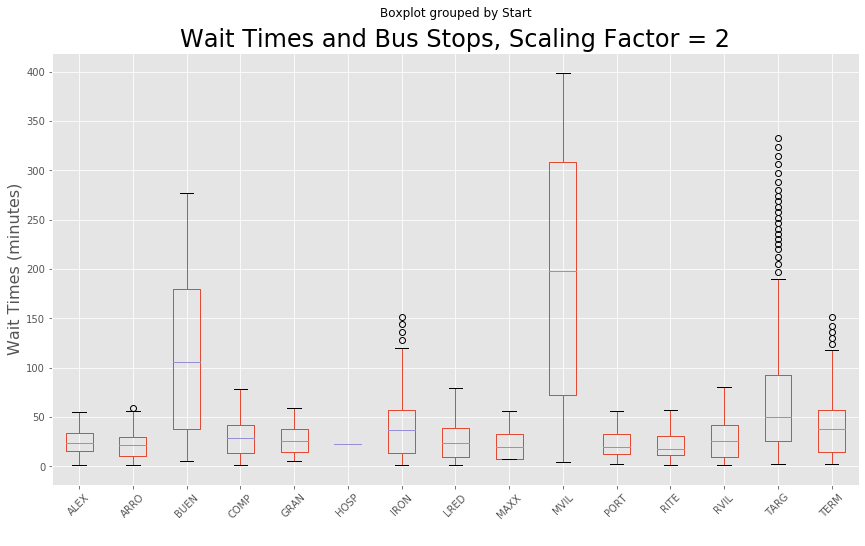

In [31]:
ax = box_students.boxplot(by = 'Start', rot=45, figsize=(14, 8))
ax.set_title('Wait Times and Bus Stops, Scaling Factor = 2', size=24)
ax.set_ylabel('Wait Times (minutes)', size=16)
ax.set_xlabel(' ', size=16)
fig = ax.get_figure()
# fig.savefig('scaled_waittimes.png')

In [86]:
bus_data = pd.read_table('bus_hist.dat', header=None, sep="\s+")

print(bus_data.info())
print()
bus_data.tail()

# time (min), bus id, bus name, bus location, minutes since last stop, # students

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 6 columns):
0    6000 non-null int64
1    6000 non-null int64
2    6000 non-null object
3    6000 non-null object
4    6000 non-null int64
5    6000 non-null int64
dtypes: int64(4), object(2)
memory usage: 281.4+ KB
None



,0,1,2,3,4,5
5995,1498,4,G,GARG,0,0
5996,1499,1,A,GARG,0,0
5997,1499,2,B,GARG,0,0
5998,1499,3,C,GARG,0,0
5999,1499,4,G,GARG,0,0


In [87]:
bus_data.columns = ['time', 'bus ID', 'bus name', 'bus location', 'min', 'no. students']

In [88]:
bus_data.head()

,time,bus ID,bus name,bus location,min,no. students
0,0,1,A,GARG,0,0
1,0,2,B,GARG,0,0
2,0,3,C,GARG,0,0
3,0,4,G,GARG,0,0
4,1,1,A,GARG,0,0


In [89]:
bus_data.drop(['bus ID', 'min'], axis=1, inplace=True)

In [90]:
bus_data

,time,bus name,bus location,no. students
0,0,A,GARG,0
1,0,B,GARG,0
2,0,C,GARG,0
3,0,G,GARG,0
4,1,A,GARG,0
...,...,...,...,...
5995,1498,G,GARG,0
5996,1499,A,GARG,0
5997,1499,B,GARG,0
5998,1499,C,GARG,0


In [91]:
maskA = bus_data['bus name'] == 'A'
A = bus_data[maskA]

In [94]:
maskB = bus_data['bus name'] == 'B'
B = bus_data[maskB]

In [95]:
maskC = bus_data['bus name'] == 'C'
C = bus_data[maskC]

In [96]:
maskG = bus_data['bus name'] == 'G'
G = bus_data[maskG]

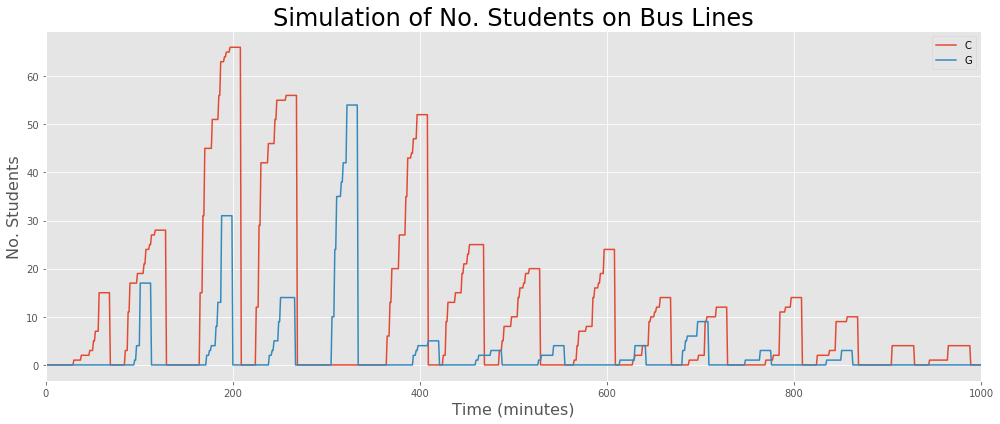

In [114]:
fig, ax = plt.subplots(figsize = (14,6))
# ax.plot(A['time'], A['no. students'], color='r', label='A')
# ax.plot(B['time'], B['no. students'], label='B')
ax.plot(C['time'], C['no. students'], label='C')
ax.plot(G['time'], G['no. students'], label='G')
ax.set_xlim(0, 1000)
ax.set_xlabel('Time (minutes)', size=16)
ax.set_ylabel('No. Students', size=16)
ax.set_title('Simulation of No. Students on Bus Lines', size=24)
ax.legend()

plt.tight_layout()
# fig.savefig('student_load.png')